In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors
import numpy as np

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
b = list(matplotlib.colors.to_rgba(colors[0]))
g = list(matplotlib.colors.to_rgba(colors[2]))
r = list(matplotlib.colors.to_rgba(colors[3]))
# r[-1] = 0.7

fig,ax = plt.subplots(1)

union = False
intersection = False

ax.add_patch(
    patches.Rectangle(xy=(1, 2), width=3, height=3,
                      linewidth=3, edgecolor=b,
                      facecolor=r if union else 'none',
                      )
)
ax.add_patch(
    patches.Rectangle(xy=(2, 1), width=3, height=2,
                      linewidth=3, edgecolor=g,
                      facecolor=r if union else'none',
                      )
)
if intersection:
    ax.add_patch(
        patches.Rectangle(xy=(2, 2), width=2, height=1,
                          linewidth=0, facecolor=r
                          )
    )

lim = 6
ax.set_xlim([0, lim])
ax.set_ylim([0, lim])
ax.set_xticks(np.arange(0, lim, 1))
ax.set_yticks(np.arange(0, lim, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid()
ax.set_aspect('equal')
fig.savefig(f'iou{"_i" if intersection else ""}{"_u" if union else ""}.png')
plt.show()


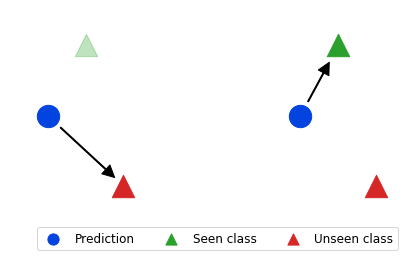

In [2]:
import matplotlib.pyplot as plt
import numpy as np

size = 500
fig, ax = plt.subplots(1)

px, py = np.array([3, 3.0])
sx, sy = np.array([6, 3.2])
ux, uy = np.array([9, 2.8])
d = 20

ax.scatter([px, d+px], [py, py], s=size, c='xkcd:blue', marker='o', label='Prediction')
ax.scatter(d+sx, sy, s=size, c='tab:green', marker='^', label='Seen class')
ax.scatter(sx, sy, s=size, c='tab:green', alpha=0.3, marker='^')
ax.scatter([ux, d+ux], [uy, uy], s=size, c='tab:red', marker='^', label='Unseen class')

# ax.arrow(px,
#          py,
#          ux - px - 1,
#          uy - py,
#          width=0.01,
#          color='k',
#          head_length=1,
#          length_includes_head=True,
#          # head_width=0.1,
#          )

start = np.array([px, py])
end = np.array([ux, uy])
start += (end - start) * 0.17
end -= (end - start) * 0.14
ax.annotate("",
            xy=end,
            xytext=start,
            arrowprops=dict(
                # arrowstyle='-|>',
                width=1,
                color='k',
            ))

start = np.array([px + d, py])
end = np.array([sx + d, sy])
start += (end - start) * 0.2
end -= (end - start) * 0.3
ax.annotate("",
            xy=end,
            xytext=start,
            arrowprops=dict(
                # arrowstyle='-|>',
                width=1,
                color='k',
            ))


# ax.set_xlim([0.2, 1])
ax.set_ylim([2.6, 3.3])


ax.legend(loc='lower center',
          # bbox_to_anchor=(0.5, -0.2),
          ncol=3,
          markerscale=0.5,
          prop={'size': 12})
plt.axis('off')
plt.tight_layout()
fig.savefig(f'zsl_vs_gzsl.png', dpi=300)
plt.show()

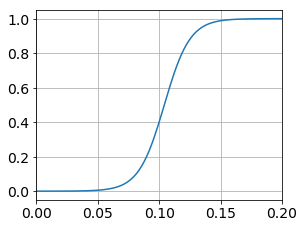

In [193]:
import numpy as np
from matplotlib import pyplot as plt

n = 1000
x = np.arange(n + 1) / n

w, k = 96, 10
T = 1 + np.exp(k - w).item()
y = T / (1 + np.exp(-(w * x - k)))

fig, ax = plt.subplots(1)
ax.plot(x, y)
# ax.set_xticks(np.arange(11) / 10)
ax.set_xticks(list(np.arange(0, 0.25, 0.05)))
ax.set_xlim([0, 0.2])
ax.tick_params(labelsize=14)
plt.grid()
fig.savefig(f'lis.png', dpi=300)
plt.tight_layout()
plt.show()